# Project 3 2. Data Cleaning and Exploratory Data Analysis

### Classification models using Natural Language Processing (NLP)

2.1 Data Reading/Cleaning <br>
2.2 Exploratory Data Analysis <br>
2.3 Adressing stopwords, Lemmetization/Stemming <br>
2.4 Visualizations <br>

Importing relevant libraries for data cleaning and EDA:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import nltk
import re
from wordcloud import WordCloud

#### 2.1. Data Reading/Cleaning

Reading the csv files that we have created in the webscraping notebook into this notebook:

In [2]:
TFR_df = pd.read_csv('./datasets/TFR_df.csv')
TFTS_df = pd.read_csv('./datasets/TFTS_df.csv')

Checking for null values in our data set:

In [3]:
TFR_df.isnull().sum()

names        0
titles       0
posts        0
subreddit    0
dtype: int64

In [4]:
TFTS_df.isnull().sum()

names        0
titles       0
posts        0
subreddit    0
dtype: int64

There are no null values so we can proceed on in the next step of our Data Cleaning! <br>

Now, both dataframes will be combined into one singular data frame, then cleaned and shuffled so that we can use it for classification later.

In [5]:
combined_df = pd.concat([TFR_df,TFTS_df]).reset_index(drop=True)
combined_df = shuffle(combined_df).reset_index(drop=True)
combined_df.head()

,names,titles,posts,subreddit
0,t3_cbbokr,That doesn't go in your password section,A silly tidbit from today. Backstory I work in...,talesfromtechsupport
1,t3_bzurqk,The day my boss remembered I quit,Obligatory long time first time and it's a lon...,talesfromtechsupport
2,t3_ckuk1n,Can I please get my data back?,"This happened to a friend, a senior manager at...",talesfromtechsupport
3,t3_cyywat,Do you want an even bigger bag for those magaz...,This happened sometime ago. Nothing major but ...,TalesFromRetail
4,t3_cxa9bf,"Can't call when the phones are down, and that'...","About 8 years ago, I was doing IT Support for ...",talesfromtechsupport


Addressing the capitalization of one of our subreddit classes by lower casing everything: 

In [6]:
combined_df['subreddit'] = combined_df['subreddit'].apply(lambda x: x.lower())

#### 2.2 Exploratory Data Analysis

Then we can check for the % of subreddit posts from each subreddit.

In [7]:
len(combined_df)

1418

In [8]:
combined_df.subreddit.value_counts(normalize=True)

talesfromtechsupport    0.688293
talesfromretail         0.311707
Name: subreddit, dtype: float64

Next, the data in the titles and posts columns should be cleaned and tokenized so that we can train our classification model after. To do that, the function below is written to be iterated through our combined dataframe to remove all unwanted things such as html tags, spaces and punctuation etc and then split into a list.

In [9]:
def string_clean(text):
    
    # Remove all HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove all URL tags
    text = re.sub(r'^https?:\/\/.*[\r\n]*','',text)
    
    # Keep text without punctuation
    text = re.sub(r'[^\w\s]','',text)
    
    # convert text to lowercase
    text = text.strip().lower()

    # split text into a list of words
    token_text = re.split('\W+',text)
    
    return token_text

Then, we can go ahead and apply this function to both our posts and titles to return us the tokens of each corresponding column.

In [10]:
combined_df['p_tokenized'] = combined_df['posts'].apply(lambda x: string_clean(x))
combined_df['t_tokenized'] = combined_df['titles'].apply(lambda x: string_clean(x))

In [11]:
combined_df.head()

,names,titles,posts,subreddit,p_tokenized,t_tokenized
0,t3_cbbokr,That doesn't go in your password section,A silly tidbit from today. Backstory I work in...,talesfromtechsupport,"[a, silly, tidbit, from, today, backstory, i, ...","[that, doesnt, go, in, your, password, section]"
1,t3_bzurqk,The day my boss remembered I quit,Obligatory long time first time and it's a lon...,talesfromtechsupport,"[obligatory, long, time, first, time, and, its...","[the, day, my, boss, remembered, i, quit]"
2,t3_ckuk1n,Can I please get my data back?,"This happened to a friend, a senior manager at...",talesfromtechsupport,"[this, happened, to, a, friend, a, senior, man...","[can, i, please, get, my, data, back]"
3,t3_cyywat,Do you want an even bigger bag for those magaz...,This happened sometime ago. Nothing major but ...,talesfromretail,"[this, happened, sometime, ago, nothing, major...","[do, you, want, an, even, bigger, bag, for, th..."
4,t3_cxa9bf,"Can't call when the phones are down, and that'...","About 8 years ago, I was doing IT Support for ...",talesfromtechsupport,"[about, 8, years, ago, i, was, doing, it, supp...","[cant, call, when, the, phones, are, down, and..."


We can see that the columns are not ordered properly and it is hard to visualize these data thus we rearrange the order of the columns.

In [12]:
combined_df = combined_df[['names','titles','t_tokenized','posts','p_tokenized','subreddit']]

In [13]:
combined_df.head()

,names,titles,t_tokenized,posts,p_tokenized,subreddit
0,t3_cbbokr,That doesn't go in your password section,"[that, doesnt, go, in, your, password, section]",A silly tidbit from today. Backstory I work in...,"[a, silly, tidbit, from, today, backstory, i, ...",talesfromtechsupport
1,t3_bzurqk,The day my boss remembered I quit,"[the, day, my, boss, remembered, i, quit]",Obligatory long time first time and it's a lon...,"[obligatory, long, time, first, time, and, its...",talesfromtechsupport
2,t3_ckuk1n,Can I please get my data back?,"[can, i, please, get, my, data, back]","This happened to a friend, a senior manager at...","[this, happened, to, a, friend, a, senior, man...",talesfromtechsupport
3,t3_cyywat,Do you want an even bigger bag for those magaz...,"[do, you, want, an, even, bigger, bag, for, th...",This happened sometime ago. Nothing major but ...,"[this, happened, sometime, ago, nothing, major...",talesfromretail
4,t3_cxa9bf,"Can't call when the phones are down, and that'...","[cant, call, when, the, phones, are, down, and...","About 8 years ago, I was doing IT Support for ...","[about, 8, years, ago, i, was, doing, it, supp...",talesfromtechsupport


This is much better organized now! However, we can furthur simplify our data by removing stopwords! Similar to what we did above, we will write a function to do this and apply it to our newly created tokenized columns.

#### 2.3 Adressing stopwords, Lemmetization/Stemming

In [14]:
def remove_stop_words(text):
    
    en_stopwords = list(nltk.corpus.stopwords.words('english'))
    text = [word for word in text if word not in en_stopwords]
    
    return text

In [15]:
combined_df['p_stopped'] = combined_df['p_tokenized'].apply(lambda x: remove_stop_words(x))
combined_df['t_stopped'] = combined_df['t_tokenized'].apply(lambda x: remove_stop_words(x))

# Rearranging columns for visibility again
combined_df = combined_df[['names','titles','t_tokenized','t_stopped','posts','p_tokenized','p_stopped','subreddit']]

In [16]:
combined_df.head()

,names,titles,t_tokenized,t_stopped,posts,p_tokenized,p_stopped,subreddit
0,t3_cbbokr,That doesn't go in your password section,"[that, doesnt, go, in, your, password, section]","[doesnt, go, password, section]",A silly tidbit from today. Backstory I work in...,"[a, silly, tidbit, from, today, backstory, i, ...","[silly, tidbit, today, backstory, work, small,...",talesfromtechsupport
1,t3_bzurqk,The day my boss remembered I quit,"[the, day, my, boss, remembered, i, quit]","[day, boss, remembered, quit]",Obligatory long time first time and it's a lon...,"[obligatory, long, time, first, time, and, its...","[obligatory, long, time, first, time, long, on...",talesfromtechsupport
2,t3_ckuk1n,Can I please get my data back?,"[can, i, please, get, my, data, back]","[please, get, data, back]","This happened to a friend, a senior manager at...","[this, happened, to, a, friend, a, senior, man...","[happened, friend, senior, manager, state, age...",talesfromtechsupport
3,t3_cyywat,Do you want an even bigger bag for those magaz...,"[do, you, want, an, even, bigger, bag, for, th...","[want, even, bigger, bag, magazines]",This happened sometime ago. Nothing major but ...,"[this, happened, sometime, ago, nothing, major...","[happened, sometime, ago, nothing, major, leav...",talesfromretail
4,t3_cxa9bf,"Can't call when the phones are down, and that'...","[cant, call, when, the, phones, are, down, and...","[cant, call, phones, thats, fault]","About 8 years ago, I was doing IT Support for ...","[about, 8, years, ago, i, was, doing, it, supp...","[8, years, ago, support, japanese, car, manufa...",talesfromtechsupport


Last but not least, we can simplify our data one more time by lemmatizing our word list.  

**Lemmatizing** and **Stemming** are two forms of shortening words so we can combine similar forms of the same word.
When we "lemmatize" data, we take words and attempt to return their lemma, or the base/dictionary form of a word e.g. destroying when lemmatized becomes destroy.

First, we import and intantiate our lemmatizer and stemmer

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

lemmatizer = WordNetLemmatizer()
p_stemmer = PorterStemmer()

Then, we write a function again to apply our lemmatizer and stemmer to our combined dataframe:

In [18]:
def lemmatize_stemmer(text):
    
    text = [lemmatizer.lemmatize(i) for i in text]
    text = [p_stemmer.stem(i) for i in text]
    
    return text

In [19]:
combined_df['p_final'] = combined_df['p_stopped'].apply(lambda x: remove_stop_words(x))
combined_df['t_final'] = combined_df['t_stopped'].apply(lambda x: remove_stop_words(x))

# Rearranging columns for visibility again
combined_df = combined_df[['names','titles','t_tokenized','t_stopped','t_final','posts','p_tokenized','p_stopped','p_final','subreddit']]

In [20]:
combined_df.head()

,names,titles,t_tokenized,t_stopped,t_final,posts,p_tokenized,p_stopped,p_final,subreddit
0,t3_cbbokr,That doesn't go in your password section,"[that, doesnt, go, in, your, password, section]","[doesnt, go, password, section]","[doesnt, go, password, section]",A silly tidbit from today. Backstory I work in...,"[a, silly, tidbit, from, today, backstory, i, ...","[silly, tidbit, today, backstory, work, small,...","[silly, tidbit, today, backstory, work, small,...",talesfromtechsupport
1,t3_bzurqk,The day my boss remembered I quit,"[the, day, my, boss, remembered, i, quit]","[day, boss, remembered, quit]","[day, boss, remembered, quit]",Obligatory long time first time and it's a lon...,"[obligatory, long, time, first, time, and, its...","[obligatory, long, time, first, time, long, on...","[obligatory, long, time, first, time, long, on...",talesfromtechsupport
2,t3_ckuk1n,Can I please get my data back?,"[can, i, please, get, my, data, back]","[please, get, data, back]","[please, get, data, back]","This happened to a friend, a senior manager at...","[this, happened, to, a, friend, a, senior, man...","[happened, friend, senior, manager, state, age...","[happened, friend, senior, manager, state, age...",talesfromtechsupport
3,t3_cyywat,Do you want an even bigger bag for those magaz...,"[do, you, want, an, even, bigger, bag, for, th...","[want, even, bigger, bag, magazines]","[want, even, bigger, bag, magazines]",This happened sometime ago. Nothing major but ...,"[this, happened, sometime, ago, nothing, major...","[happened, sometime, ago, nothing, major, leav...","[happened, sometime, ago, nothing, major, leav...",talesfromretail
4,t3_cxa9bf,"Can't call when the phones are down, and that'...","[cant, call, when, the, phones, are, down, and...","[cant, call, phones, thats, fault]","[cant, call, phones, thats, fault]","About 8 years ago, I was doing IT Support for ...","[about, 8, years, ago, i, was, doing, it, supp...","[8, years, ago, support, japanese, car, manufa...","[8, years, ago, support, japanese, car, manufa...",talesfromtechsupport


Finally, for future modelling needs, we will combine all the words we have gotten for both the titles and the posts into one singular column containing all the words from these two columns.

In [21]:
combined_df['final_combined'] = combined_df['t_final'] + combined_df['p_final']

In [22]:
combined_df.head()

,names,titles,t_tokenized,t_stopped,t_final,posts,p_tokenized,p_stopped,p_final,subreddit,final_combined
0,t3_cbbokr,That doesn't go in your password section,"[that, doesnt, go, in, your, password, section]","[doesnt, go, password, section]","[doesnt, go, password, section]",A silly tidbit from today. Backstory I work in...,"[a, silly, tidbit, from, today, backstory, i, ...","[silly, tidbit, today, backstory, work, small,...","[silly, tidbit, today, backstory, work, small,...",talesfromtechsupport,"[doesnt, go, password, section, silly, tidbit,..."
1,t3_bzurqk,The day my boss remembered I quit,"[the, day, my, boss, remembered, i, quit]","[day, boss, remembered, quit]","[day, boss, remembered, quit]",Obligatory long time first time and it's a lon...,"[obligatory, long, time, first, time, and, its...","[obligatory, long, time, first, time, long, on...","[obligatory, long, time, first, time, long, on...",talesfromtechsupport,"[day, boss, remembered, quit, obligatory, long..."
2,t3_ckuk1n,Can I please get my data back?,"[can, i, please, get, my, data, back]","[please, get, data, back]","[please, get, data, back]","This happened to a friend, a senior manager at...","[this, happened, to, a, friend, a, senior, man...","[happened, friend, senior, manager, state, age...","[happened, friend, senior, manager, state, age...",talesfromtechsupport,"[please, get, data, back, happened, friend, se..."
3,t3_cyywat,Do you want an even bigger bag for those magaz...,"[do, you, want, an, even, bigger, bag, for, th...","[want, even, bigger, bag, magazines]","[want, even, bigger, bag, magazines]",This happened sometime ago. Nothing major but ...,"[this, happened, sometime, ago, nothing, major...","[happened, sometime, ago, nothing, major, leav...","[happened, sometime, ago, nothing, major, leav...",talesfromretail,"[want, even, bigger, bag, magazines, happened,..."
4,t3_cxa9bf,"Can't call when the phones are down, and that'...","[cant, call, when, the, phones, are, down, and...","[cant, call, phones, thats, fault]","[cant, call, phones, thats, fault]","About 8 years ago, I was doing IT Support for ...","[about, 8, years, ago, i, was, doing, it, supp...","[8, years, ago, support, japanese, car, manufa...","[8, years, ago, support, japanese, car, manufa...",talesfromtechsupport,"[cant, call, phones, thats, fault, 8, years, a..."


We can now finally save this into a csv file so that it can be used in our final notebook where we will be doing our modelling.

In [23]:
combined_df.to_csv('./datasets/combined_df.csv',index=False)

#### 2.4 Visualizations (Extra)

Defining some functions to help us in our visualizations later.

In [34]:
def word_counter(data):
    word_counts = {}
    words = data.split()
    
    for word in words:
        if word not in word_dict_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1
            
    return word_counts

For a start, we plot the WordCloud image for the top 100 words that we see in our posts from TalesOfRetail.

(-0.5, 999.5, 749.5, -0.5)

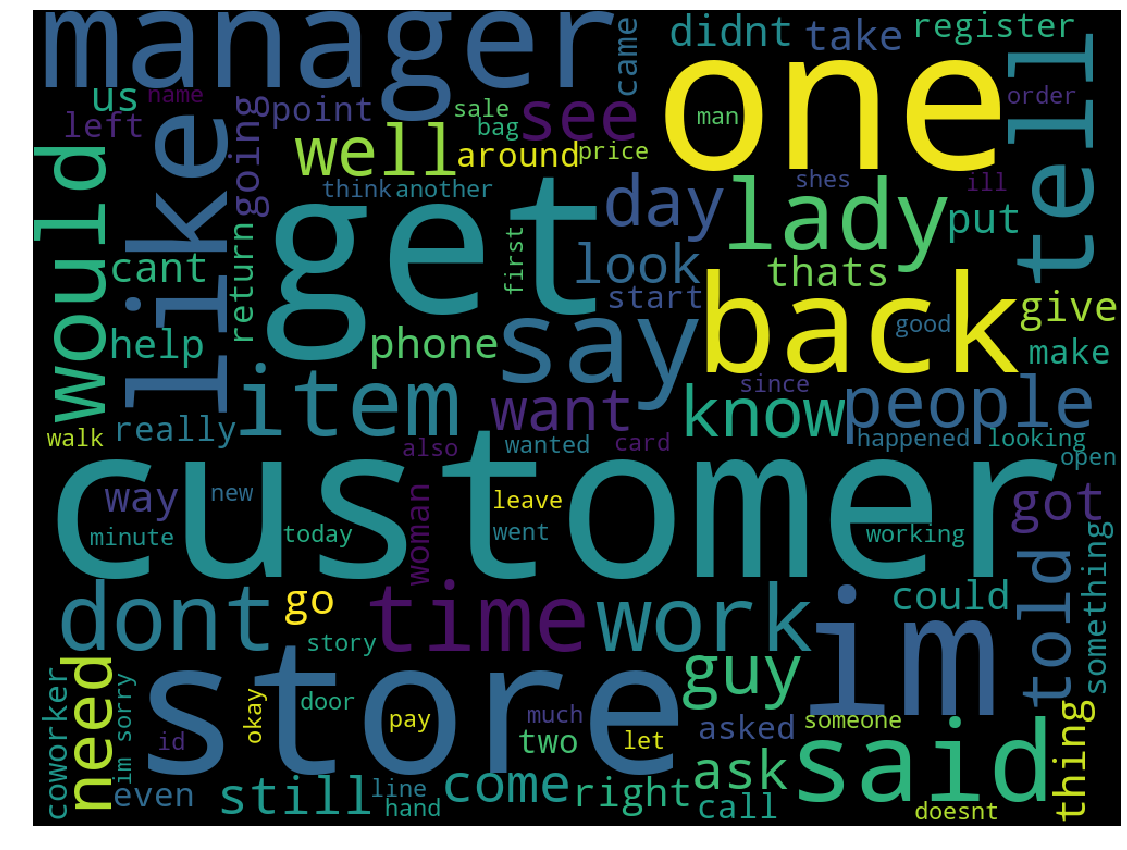

In [47]:
TFR_text = ' '

en_stopwords = list(nltk.corpus.stopwords.words('english'))

for x in combined_df[combined_df['subreddit'] == 'talesfromretail']['final_combined']: 
    for words in x: 
        TFR_text = TFR_text + words + ' '

TFR_wc = WordCloud(max_words= 100,
                      width = 1000, 
                      height = 750,
                      background_color ='black',
                      stopwords=en_stopwords, 
                      contour_width=3, 
                      contour_color='red',
                      min_font_size = 10).generate(TFR_text) 
                      
plt.figure(figsize = (20, 15)) 
plt.imshow(TFR_wc) 
plt.axis("off")

Then, we place the entire list of words and their counts into a DataFrame and proceed to sort them in descending order so that we can plot the corresponding bar plot out.

Text(0.5, 1.0, 'Top 20 words for r/TalesFromRetail')

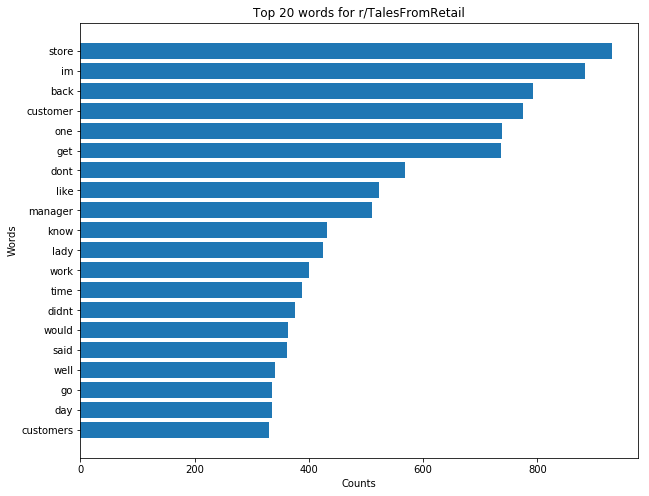

In [48]:
TFR_wordcount_df = pd.DataFrame(word_counter(TFR_text),index=['word_count']).T.sort_values(by='word_count',ascending=False).reset_index()
TFR_wordcount_df = TFR_wordcount_df.rename(index=str,columns={'index':'word'})

plt.figure(figsize=(10,8))
plt.barh(y=TFR_wordcount_df['word'].head(20)[::-1],
         width=TFR_wordcount_df['word_count'].head(20)[::-1])
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 20 words for r/TalesFromRetail')

Next, we can do the same for our other subreddit, TalesFromTechSupport.

(-0.5, 999.5, 749.5, -0.5)

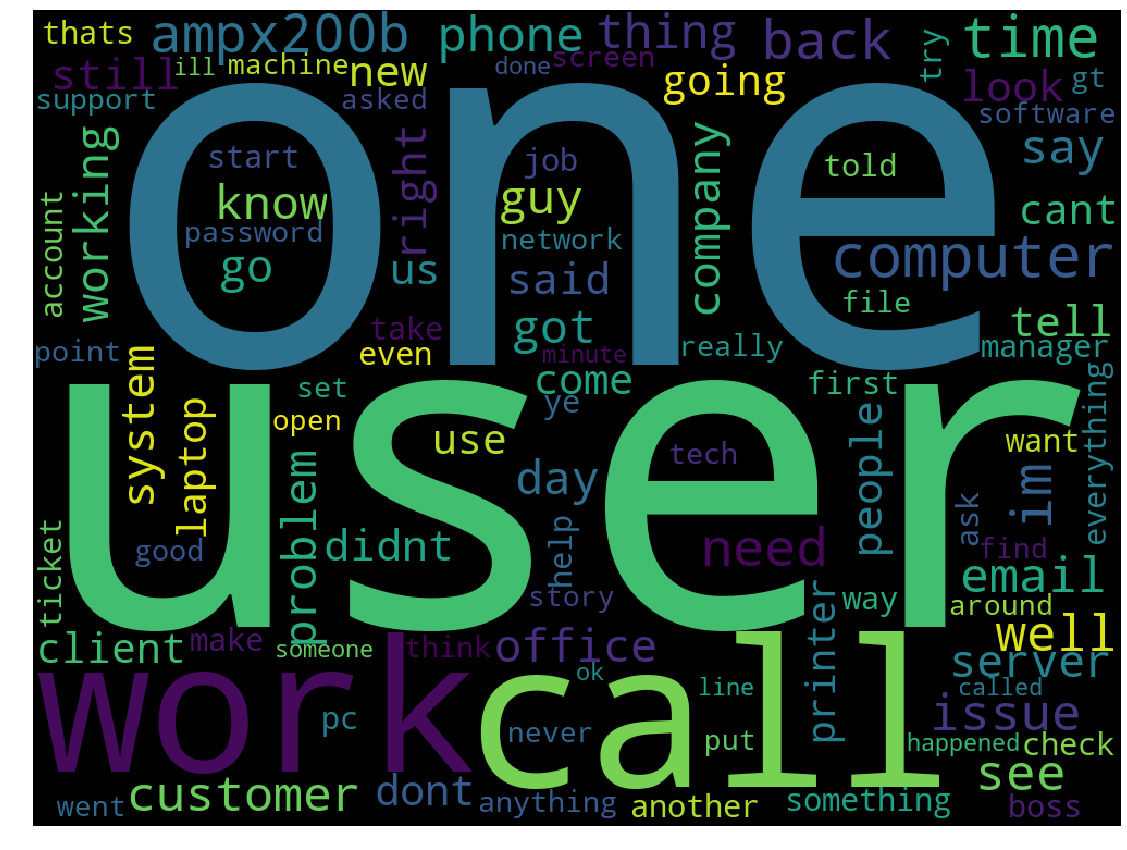

In [54]:
TFTS_text = ' '

en_stopwords = list(nltk.corpus.stopwords.words('english'))

for x in combined_df[combined_df['subreddit'] == 'talesfromtechsupport']['final_combined']: 
    for words in x: 
        TFTS_text = TFTS_text + words + ' '

TFTS_wc = WordCloud(max_words= 100,
                      width = 1000, 
                      height = 750,
                      background_color ='black',
                      stopwords=en_stopwords.extend(['x200b','amp']), 
                      contour_width=3, 
                      contour_color='red',
                      min_font_size = 10).generate(TFTS_text) 
                      
plt.figure(figsize = (20, 15)) 
plt.imshow(TFTS_wc) 
plt.axis("off")

Text(0.5, 1.0, 'Top 20 words for r/TalesFromTechSupport')

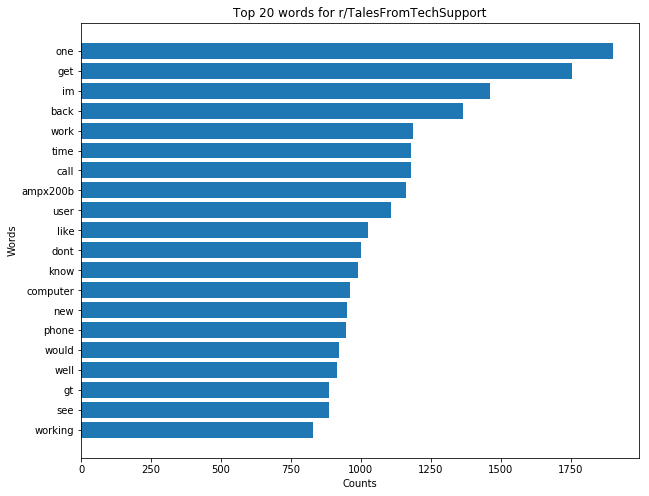

In [55]:
TFTS_wordcount_df = pd.DataFrame(word_counter(TFTS_text),index=['word_count']).T.sort_values(by='word_count',ascending=False).reset_index()
TFTS_wordcount_df = TFTS_wordcount_df.rename(index=str,columns={'index':'word'})

plt.figure(figsize=(10,8))
plt.barh(y=TFTS_wordcount_df['word'].head(20)[::-1],
         width=TFTS_wordcount_df['word_count'].head(20)[::-1])
plt.ylabel('Words')
plt.xlabel('Counts')
plt.title('Top 20 words for r/TalesFromTechSupport')